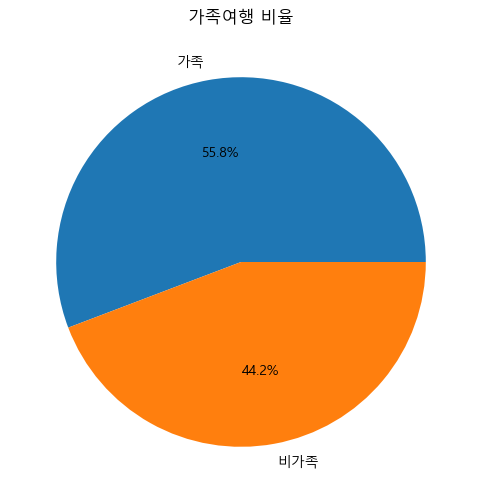

In [19]:
import pandas as pd

file_path = r'C:\Users\hanaj\OneDrive\문서\[강남구혁신인재육성아카데미]데이터분석\미니프로젝트\국내여행로그데이터\동부권\TS_csv'
companion = pd.read_csv(file_path + r'\tn_companion_info_동반자정보_B.csv')

com_id = {
    "COMPANION_SEQ": "동반자순번",
    "TRAVEL_ID": "여행ID",
    "REL_CD": "동반자관계코드",                  ## TCR
    "COMPANION_GENDER": "동반자성별",           ## GEN
    "COMPANION_AGE_GRP": "동반자연령대",        ## AGE
    "COMPANION_SITUATION": "동반자동반상황"     ## CST
}

companion.rename(columns=com_id, inplace=True)

code_B = pd.read_csv(file_path + r'\tc_codeb_코드B.csv')

def dic_map(table, code, col):
    code_map = code_B[code_B['cd_a']== code][['cd_b', 'cd_nm']]
    code_map['cd_b'] = code_map['cd_b'].astype(int)
    code_dic = code_map.set_index('cd_b')['cd_nm'].to_dict()
    table[col] = table[col].astype("Int64").map(code_dic)
    return table
    
companion = dic_map(companion, 'TCR', '동반자관계코드')
companion = dic_map(companion, 'GEN', '동반자성별')
companion = dic_map(companion, 'AGE', '동반자연령대')
companion = dic_map(companion, 'CST', '동반자동반상황')

family = companion[companion['동반자관계코드'].isin(['자녀', '배우자', '형제/자매','부모', '친인척', '조부모'])].copy()
notfamily = companion[companion['동반자관계코드'].isin(['친구', '연인', '친목 단체/모임(동호회, 종교단체 등)', '기타', '동료'])].copy()

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

labels = ['가족', '비가족']
sizes = [len(family), len(notfamily)]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('가족여행 비율')
plt.show()

In [14]:
import pandas as pd

file_path = r'C:\Users\hanaj\OneDrive\문서\[강남구혁신인재육성아카데미]데이터분석\미니프로젝트\국내여행로그데이터\동부권\TS_csv'
companion = pd.read_csv(file_path + r'\tn_companion_info_동반자정보_B.csv')

com_id = {
    "COMPANION_SEQ": "동반자순번",
    "TRAVEL_ID": "여행ID",
    "REL_CD": "동반자관계코드",                  ## TCR
    "COMPANION_GENDER": "동반자성별",           ## GEN
    "COMPANION_AGE_GRP": "동반자연령대",        ## AGE
    "COMPANION_SITUATION": "동반자동반상황"     ## CST
}

companion.rename(columns=com_id, inplace=True)

code_B = pd.read_csv(file_path + r'\tc_codeb_코드B.csv')

def dic_map(table, code, col):
    code_map = code_B[code_B['cd_a']== code][['cd_b', 'cd_nm']]
    code_map['cd_b'] = code_map['cd_b'].astype(int)
    code_dic = code_map.set_index('cd_b')['cd_nm'].to_dict()
    table[col] = table[col].astype("Int64").map(code_dic)
    return table
    
companion = dic_map(companion, 'TCR', '동반자관계코드')
companion = dic_map(companion, 'GEN', '동반자성별')
companion = dic_map(companion, 'AGE', '동반자연령대')
companion = dic_map(companion, 'CST', '동반자동반상황')
companion

,동반자순번,여행ID,동반자관계코드,동반자성별,동반자연령대,동반자동반상황
0,1,b_b002151,배우자,남자,50대,계속 함께 여행
1,5,b_b004786,친인척,여자,30대,여행 중 합류
2,1,b_b002864,배우자,남자,60대,계속 함께 여행
3,1,b_b011077,자녀,여자,~9세이하,계속 함께 여행
4,3,b_b000838,자녀,남자,~9세이하,계속 함께 여행
...,...,...,...,...,...,...
4927,2,b_b007950,부모,여자,70세이상,계속 함께 여행
4928,2,b_b004623,친구,여자,20대,계속 함께 여행
4929,4,b_b010803,자녀,남자,30대,계속 함께 여행
4930,3,b_b000064,친구,여자,30대,계속 함께 여행


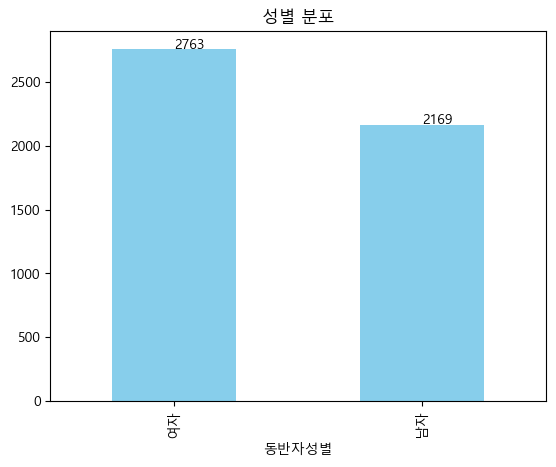

In [ ]:
gender_counts = companion['동반자성별'].value_counts()
ax = gender_counts.plot(kind='bar', color='skyblue')

for i, count in enumerate(gender_counts):
    plt.text(i, count+1, str(count))

plt.title('성별 분포')
plt.show()

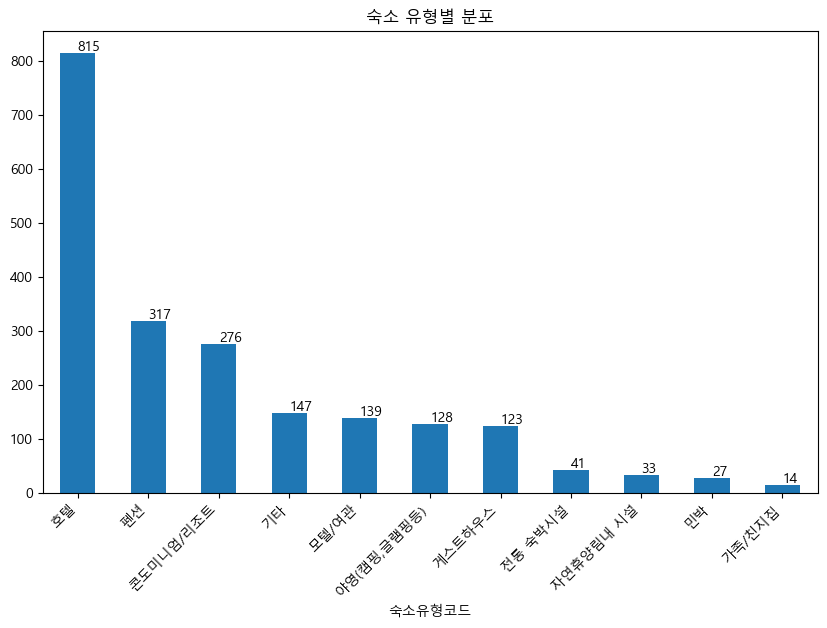

In [36]:
import pandas as pd

file_path = r'C:\Users\hanaj\OneDrive\문서\[강남구혁신인재육성아카데미]데이터분석\미니프로젝트\국내여행로그데이터\동부권\TS_csv'
lodgment = pd.read_csv(file_path + r'\tn_lodge_consume_his_숙박소비내역_B.csv')

rename_map = {
    "TRAVEL_ID": "여행ID",
    "LODGING_NM": "숙소명",
    "LODGING_PAYMENT_SEQ": "숙박경비순번",
    "LODGING_TYPE_CD": "숙소유형코드",
    "RSVT_YN": "예약여부",
    "CHK_IN_DT_MIN": "체크인시간_분",
    "CHK_OUT_DT_MIN": "체크아웃시간_분",
    "PAYMENT_NUM": "소비인원",
    "BRNO": "사업자등록번호",
    "STORE_NM": "상호명",
    "ROAD_NM_ADDR": "도로명주소",
    "LOTNO_ADDR": "지번주소",
    "ROAD_NM_CD": "도로명코드",
    "LOTNO_CD": "지번코드",
    "PAYMENT_DT": "결제일시_분",
    "PAYMENT_MTHD_SE": "결제방식구분",
    "PAYMENT_AMT_WON": "결제금액_원",
    "PAYMENT_ETC": "소비내역_기타"
}
lodgment.rename(columns=rename_map, inplace=True)

code_B = pd.read_csv(file_path + r'\tc_codeb_코드B.csv')

def dic_map(table, code, col):
    code_map = code_B[code_B['cd_a']== code][['cd_b', 'cd_nm']]
    code_map['cd_b'] = code_map['cd_b'].astype(int)
    code_dic = code_map.set_index('cd_b')['cd_nm'].to_dict()
    table[col] = table[col].astype("Int64").map(code_dic)
    return table
    
lodgment = dic_map(lodgment, 'HTY', '숙소유형코드')
lodgment = dic_map(lodgment, 'PAY', '결제방식구분')
lodgment_counts = lodgment['숙소유형코드'].value_counts()

plt.figure(figsize=(10,6))
lodgment_counts.plot(kind='bar')

for i, count in enumerate(lodgment_counts):
    plt.text(i, count+5, str(count))

plt.title('숙소 유형별 분포')
plt.xticks(rotation=45, ha='right')
plt.show()    